# load libraries

In [1]:
import numpy as np
import pandas as pd
import glob

# import the Subject class from `subject.py`

In [2]:
from subject import Subject
from subject import Multisubject

//anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# get subject IDs
Find files matching `sub-*` in the model directory and save them in `ids`.

You could also skip this step and specify a specific subject(s) directly.

In [3]:
files=sorted(glob.glob("/Users/danicosme/Desktop/event/sub-*"))
ids = [i.lstrip('/Users/danicosme/Desktop/event/sub-') for i in files]
ids

['FP001', 'FP002']

# load data
Instantiate subjects in `ids`
* `id` = subject ID(s)
* `path` = path to model directory

In [4]:
subjects = [Subject(id=id, path='/Users/danicosme/Desktop/event') for id in ids]

# get contrast list
Get contrast information from one subject

In [5]:
subjects[1].contrasts

{'con_0001.nii': 'Contrast 1: No Choice Look > Rest - All Sessions',
 'con_0002.nii': 'Contrast 2: No Choice Regulate > Rest - All Sessions',
 'con_0003.nii': 'Contrast 3: Yes Choice Look > Rest - All Sessions',
 'con_0004.nii': 'Contrast 4: Yes Choice Regulate > Rest - All Sessions',
 'con_0005.nii': 'Contrast 5: Preview > Rest - All Sessions',
 'con_0006.nii': 'Contrast 6: Cue > Rest - All Sessions',
 'con_0007.nii': 'Contrast 7: Craving Rating > Rest - All Sessions',
 'con_0008.nii': 'Contrast 8: Difficulty Rating > Rest - All Sessions',
 'con_0009.nii': 'Contrast 9: Look > Rest - All Sessions',
 'con_0010.nii': 'Contrast 10: Regulate > Rest - All Sessions',
 'con_0011.nii': 'Contrast 11: No Choice > Rest - All Sessions',
 'con_0012.nii': 'Contrast 12: Yes Choice > Rest - All Sessions',
 'con_0013.nii': 'Contrast 13: Ratings > Rest - All Sessions',
 'con_0014.nii': 'Contrast 14: Regulate > Look - All Sessions',
 'con_0015.nii': 'Contrast 15: Yes Choice > No Choice - All Sessions',
 

In [14]:
subjects[1].betas

{'beta_0001.nii': 'spm_spm:beta (0001) - Sn(1) noChoiceLook*bf(1)',
 'beta_0002.nii': 'spm_spm:beta (0002) - Sn(1) noChoiceRegulate*bf(1)',
 'beta_0003.nii': 'spm_spm:beta (0003) - Sn(1) yesChoiceLook*bf(1)',
 'beta_0004.nii': 'spm_spm:beta (0004) - Sn(1) yesChoiceRegulate*bf(1)',
 'beta_0005.nii': 'spm_spm:beta (0005) - Sn(1) preview*bf(1)',
 'beta_0006.nii': 'spm_spm:beta (0006) - Sn(1) cue*bf(1)',
 'beta_0007.nii': 'spm_spm:beta (0007) - Sn(1) cravingRating*bf(1)',
 'beta_0008.nii': 'spm_spm:beta (0008) - Sn(1) difficultyRating*bf(1)',
 'beta_0009.nii': 'spm_spm:beta (0009) - Sn(1) R1',
 'beta_0010.nii': 'spm_spm:beta (0010) - Sn(1) R2',
 'beta_0011.nii': 'spm_spm:beta (0011) - Sn(1) R3',
 'beta_0012.nii': 'spm_spm:beta (0012) - Sn(1) R4',
 'beta_0013.nii': 'spm_spm:beta (0013) - Sn(1) R5',
 'beta_0014.nii': 'spm_spm:beta (0014) - Sn(2) noChoiceLook*bf(1)',
 'beta_0015.nii': 'spm_spm:beta (0015) - Sn(2) noChoiceRegulate*bf(1)',
 'beta_0016.nii': 'spm_spm:beta (0016) - Sn(2) yesChoic

# plot contasts
Specify a regular expression pattern and plot contrasts that match this pattern for all subjects in `subjects`

Use the following arguments:
* `pattern` = regular expression pattern
* `contrast` = True or False

[None, None]

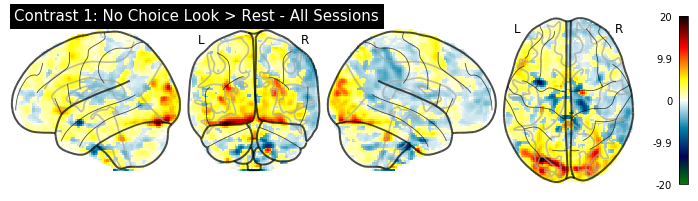

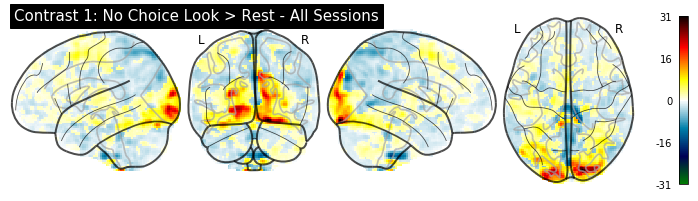

In [8]:
[sub.plot_data(pattern = "Contrast 1:", contrast = True) for sub in subjects]

In [9]:
[sub.plot_data(pattern = "Contrast 1:", contrast = False) for sub in subjects]

[None, None]

In [10]:
[sub.plot_data(pattern = "0001", contrast = True) for sub in subjects]

[None, None]

[None, None]

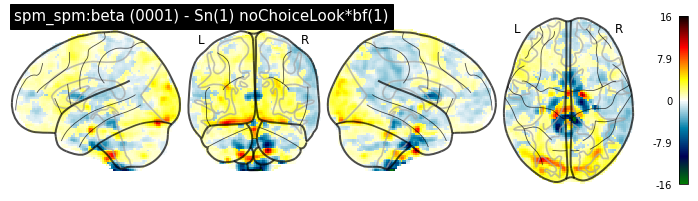

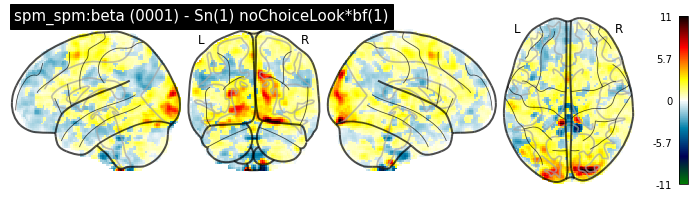

In [11]:
[sub.plot_data(pattern = "0001", contrast = False) for sub in subjects]

# print summary stats
Calculate summary stats (e.g., mean, SD, min, max) for each contrast image specified and subject

Arugments are positional as follows: pattern, contrast (True/False), functions

In [10]:
pd.concat([s.apply_to_pattern("Craving Rating", True, np.mean, np.std, np.min, np.max) for s in subjects])

,id,filename,contrast,mean,std,amin,amax
0,FP001,con_0007.nii,Contrast 7: Craving Rating > Rest - All Sessions,-0.143375,2.191503,-19.178230,23.383509
0,FP002,con_0007.nii,Contrast 7: Craving Rating > Rest - All Sessions,1.061200,5.309083,-32.227547,53.107422


In [11]:
pd.concat([s.apply_to_pattern("Craving Rating", False, np.mean, np.std, np.min, np.max) for s in subjects])

,id,filename,beta,mean,std,amin,amax


In [12]:
pd.concat([s.apply_to_pattern("beta", True, np.mean, np.std, np.min, np.max) for s in subjects])


,id,filename,contrast,mean,std,amin,amax


In [13]:
pd.concat([s.apply_to_pattern("beta", False, np.mean, np.std, np.min, np.max) for s in subjects])

,id,filename,beta,mean,std,amin,amax
0,FP001,beta_0001.nii,spm_spm:beta (0001) - Sn(1) noChoiceLook*bf(1),1.100659e-01,9.248490e-01,-1.576579e+01,1.299820e+01
1,FP001,beta_0002.nii,spm_spm:beta (0002) - Sn(1) noChoiceRegulate*b...,4.539853e-01,1.015535e+00,-1.172033e+01,1.100633e+01
2,FP001,beta_0003.nii,spm_spm:beta (0003) - Sn(1) yesChoiceLook*bf(1),2.404821e-01,9.319965e-01,-1.403660e+01,1.115762e+01
3,FP001,beta_0004.nii,spm_spm:beta (0004) - Sn(1) yesChoiceRegulate*...,3.762958e-01,7.928806e-01,-8.162491e+00,1.108202e+01
4,FP001,beta_0005.nii,spm_spm:beta (0005) - Sn(1) preview*bf(1),4.926303e-01,1.737100e+00,-3.122979e+01,1.653580e+01
5,FP001,beta_0006.nii,spm_spm:beta (0006) - Sn(1) cue*bf(1),7.807076e-01,1.720245e+00,-1.614228e+01,2.505490e+01
6,FP001,beta_0007.nii,spm_spm:beta (0007) - Sn(1) cravingRating*bf(1),-3.530310e-01,1.204401e+00,-1.127364e+01,2.014706e+01
7,FP001,beta_0008.nii,spm_spm:beta (0008) - Sn(1) difficultyRating*b...,7.758538e-01,1.956555e+00,-3.187221e+01,2.539458e+01
8,FP001,beta_0009.nii,spm_spm:beta (0009) - Sn(1) R1,3.491033e-01,2.840277e+00,-5.528484e+01,2.662603e+01
9,FP001,beta_0010.nii,spm_spm:beta (0010) - Sn(1) R2,-1.000797e-01,1.739016e+00,-2.244199e+01,1.624780e+01
